# Universidade Federal da Bahia
### TCC - Aplicação de algoritmo não supervisionado para escolha de carteira de fundos imobiliários

- Lennon Negrão Roseira

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import sqrt

### Declarando funções

In [2]:
def calculate_wcss(data):
    """ Ajustar diversos K-means e coletar o valor
    da inércia de todos ajustes."""
    wcss = []
    model_list = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
        model_list.append(kmeans)

    return wcss, model_list
       
def get_best_number_clusters(wcss):
    """Traçar uma reta virtual entre os extremos da curva
    da inércia e calcular o N mais se aproxima dessa reta"""
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

## 1) Carregando dados de fundos imobiliários de maio/2022

In [3]:
df = pd.read_excel('./fii.xls')
df

,CÓDIGO DO FUNDO,SETOR,PREÇO ATUAL,LIQUIDEZ DIÁRIA,DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY (3M) MÉDIA,...,PATRIMÔNIO LIQ.,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. NO PERÍODO,RENTAB. PATR. ACUMULADA,VACÂNCIA FÍSICA,VACÂNCIA FINANCEIRA,QUANTIDADE ATIVOS
0,ABCP11,Shoppings,75.00,1127.0,0.65,0.0088,0.0214,0.0492,0.0877,0.0071,...,1.121420e+09,91.89,0.82,0.0054,0.0011,0.0065,0.0205,0.0750,NaN,1
1,AFHI11,Títulos e Val. Mob.,98.90,8916.0,1.35,0.0131,0.0385,0.0764,0.0000,0.0128,...,1.738249e+08,97.24,1.02,0.0139,0.0044,0.0183,0.0320,NaN,NaN,0
2,AFOF11,Títulos e Val. Mob.,89.15,408.0,1.01,0.0107,0.0321,0.0626,0.0000,0.0107,...,7.072136e+07,102.32,0.87,0.0098,0.0126,0.0225,0.0557,NaN,NaN,0
3,AIEC11,Lajes Corporativas,78.78,11712.0,0.72,0.0090,0.0335,0.0584,0.1022,0.0112,...,4.883861e+08,101.22,0.78,0.0129,-0.0070,0.0058,0.0189,0.0000,NaN,2
4,ALMI11,Lajes Corporativas,931.00,4.0,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,...,2.496330e+08,2245.37,0.41,NaN,NaN,NaN,NaN,0.6405,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,XPML11,Shoppings,96.40,30352.0,0.66,0.0066,0.0201,0.0402,0.0690,0.0067,...,1.900968e+09,101.76,0.95,0.0065,0.0000,0.0065,0.0124,0.0390,NaN,16
278,XPPR11,Outros,55.26,12618.0,0.45,0.0077,0.0233,0.0478,0.0952,0.0078,...,5.747006e+08,78.55,0.70,0.0057,-0.0050,0.0007,-0.0241,0.4600,0.0,4
279,XPSF11,Outros,7.20,62316.0,0.68,0.0093,0.0280,0.0545,0.1043,0.0093,...,3.744337e+08,86.47,0.08,0.0077,0.0113,0.0191,0.0038,NaN,NaN,0
280,XTED11,Lajes Corporativas,6.19,425.0,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,...,2.730595e+07,13.89,0.45,NaN,NaN,NaN,NaN,0.0000,1.0,1


## 2) Seleção dos indicadores de interesse para análise de carteira
- Foram escolhidos para o estudo os indicadores de DY, DY médio nos últimos 3 meses e P/VPA

In [4]:
cols = ['CÓDIGO DO FUNDO', 'DIVIDEND YIELD', 'DY (3M) MÉDIA', 'P/VPA']

In [5]:
df = df[cols].set_index('CÓDIGO DO FUNDO')

In [6]:
# Removendo papeis com nan do p/vpa
df = df[~df['P/VPA'].isnull()]
df = df[~df['DY (3M) MÉDIA'].isnull()]
df = df[~df['DIVIDEND YIELD'].isnull()]
df

,DIVIDEND YIELD,DY (3M) MÉDIA,P/VPA
CÓDIGO DO FUNDO,,,
ABCP11,0.0088,0.0071,0.82
AFHI11,0.0131,0.0128,1.02
AFOF11,0.0107,0.0107,0.87
AIEC11,0.0090,0.0112,0.78
ALMI11,0.0000,0.0000,0.41
...,...,...,...
XPLG11,0.0067,0.0069,0.83
XPML11,0.0066,0.0067,0.95
XPPR11,0.0077,0.0078,0.70


- Escalonamento de dados percentuais

In [7]:
df['DY (3M) MÉDIA'] = df['DY (3M) MÉDIA']*100
df['DIVIDEND YIELD'] = df['DIVIDEND YIELD']*100

## 3) Cálculo do numero ótimo de grupos

- Para selecionar o melhor modelo, utilizaremos a técnica do "cotovelo" baseado na Inércia de modelos calculados entre 2 a 20 grupos. O ponto de inflexão da curva representa o número ótimo de grupos a ser utilizado.

In [8]:
wcss, model_list = calculate_wcss(df)

Text(0.5, 1.0, 'Elbow Method utilizando Inercia')

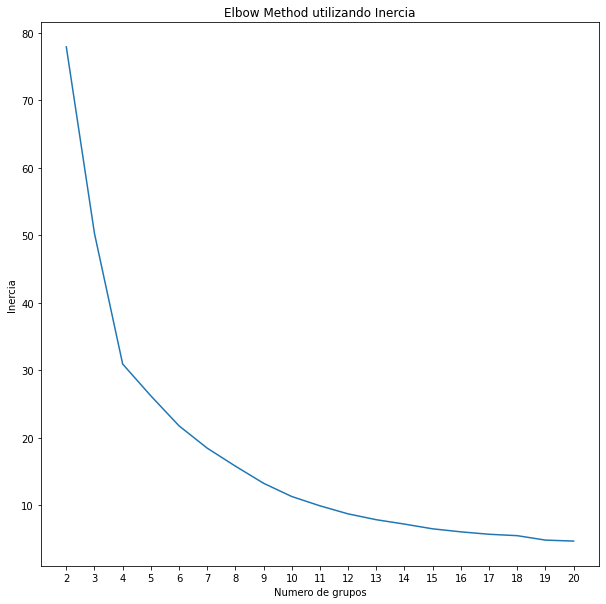

In [9]:
plot = pd.DataFrame({'wcss':wcss,'groups':range(2,21)}).plot(x='groups', y='wcss', xticks=range(2,21), figsize=(10, 10),legend=False)
plot.set_xlabel("Numero de grupos")
plot.set_ylabel("Inercia")
plot.set_title("Elbow Method utilizando Inercia")

- Calculando número ótimo de clusters

In [10]:
best_cluster_number = get_best_number_clusters(wcss)

In [11]:
best_cluster_number

6

## 4) Classificação dos dados com o modelo escolhido

- Selecionamos o modelo correspondente ao numero ótimo e realizamos a predição armazenando resultados na coluna "group"

In [12]:
model = model_list[best_cluster_number-2]

In [13]:
df['group'] = model.predict(df)

In [14]:
df

,DIVIDEND YIELD,DY (3M) MÉDIA,P/VPA,group
CÓDIGO DO FUNDO,,,,
ABCP11,0.88,0.71,0.82,4
AFHI11,1.31,1.28,1.02,0
AFOF11,1.07,1.07,0.87,4
AIEC11,0.90,1.12,0.78,4
ALMI11,0.00,0.00,0.41,3
...,...,...,...,...
XPLG11,0.67,0.69,0.83,1
XPML11,0.66,0.67,0.95,1
XPPR11,0.77,0.78,0.70,4


## 5) Salvamos resultados em excel para análise

In [15]:
df.to_excel('./result.xls')

In [23]:
df

,DIVIDEND YIELD,DY (3M) MÉDIA,P/VPA,group
CÓDIGO DO FUNDO,,,,
ABCP11,0.88,0.71,0.82,4
AFHI11,1.31,1.28,1.02,0
AFOF11,1.07,1.07,0.87,4
AIEC11,0.90,1.12,0.78,4
ALMI11,0.00,0.00,0.41,3
...,...,...,...,...
XPLG11,0.67,0.69,0.83,1
XPML11,0.66,0.67,0.95,1
XPPR11,0.77,0.78,0.70,4


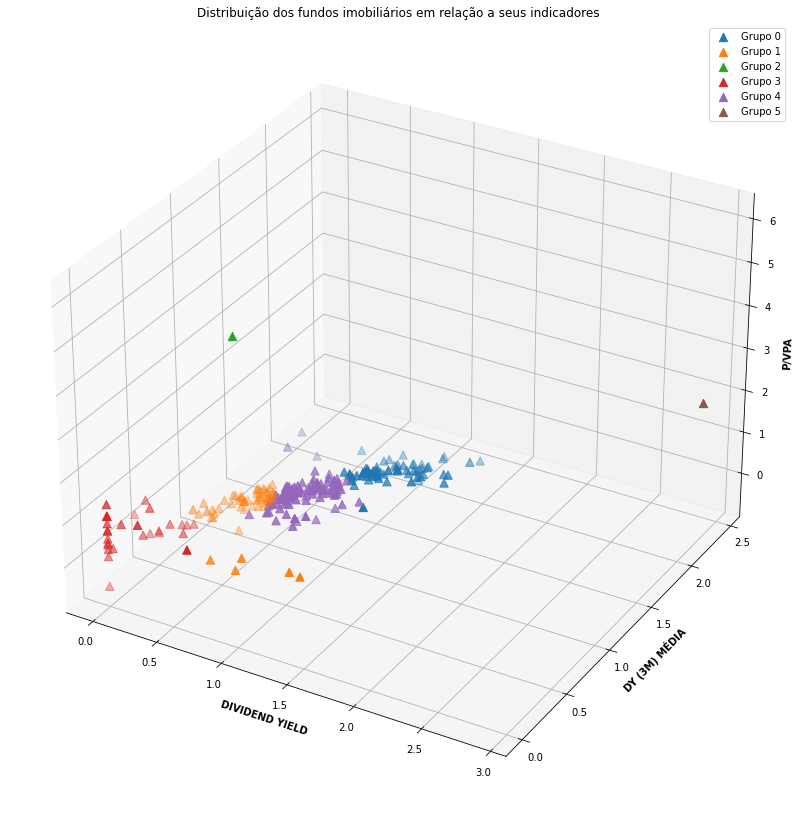

In [50]:
import matplotlib.pyplot as plt

# Creating dataset
z = df['P/VPA']
x = df['DIVIDEND YIELD']
y = df['DY (3M) MÉDIA']
 
# Creating figure
fig = plt.figure(figsize = (32*0.8, 18*0.8))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x[df['group']==0], y[df['group']==0], z[df['group']==0], marker ='^', s=70)
ax.scatter3D(x[df['group']==1], y[df['group']==1], z[df['group']==1], marker ='^', s=70)
ax.scatter3D(x[df['group']==2], y[df['group']==2], z[df['group']==2], marker ='^', s=70)
ax.scatter3D(x[df['group']==3], y[df['group']==3], z[df['group']==3], marker ='^', s=70)
ax.scatter3D(x[df['group']==4], y[df['group']==4], z[df['group']==4], marker ='^', s=70)
ax.scatter3D(x[df['group']==5], y[df['group']==5], z[df['group']==5], marker ='^', s=70)

 
plt.title("Distribuição dos fundos imobiliários em relação a seus indicadores")
ax.set_xlabel('DIVIDEND YIELD', fontweight ='bold')
ax.set_ylabel('DY (3M) MÉDIA', fontweight ='bold')
ax.set_zlabel('P/VPA', fontweight ='bold')
ax.legend(['Grupo 0', 'Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'])
 
# show plot
plt.show()

array([4, 0, 4, 4, 3, 1, 0, 0, 0, 3, 0, 0, 4, 3, 4, 4, 4, 4, 0, 3, 4, 0,
       1, 1, 0, 4, 3, 4, 4, 0, 4, 1, 1, 4, 1, 1, 4, 0, 1, 4, 1, 3, 0, 3,
       4, 0, 4, 3, 4, 4, 0, 4, 3, 0, 1, 4, 1, 4, 4, 3, 0, 0, 3, 4, 1, 4,
       0, 0, 3, 3, 4, 4, 4, 4, 4, 1, 0, 4, 1, 4, 3, 3, 0, 1, 4, 4, 1, 4,
       0, 4, 1, 0, 3, 4, 3, 1, 4, 1, 0, 4, 4, 4, 0, 4, 1, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 4, 0, 1, 4, 1, 3, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0,
       1, 0, 1, 4, 5, 4, 1, 4, 0, 0, 3, 1, 0, 1, 4, 4, 1, 1, 0, 4, 0, 4,
       0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 3, 4, 1, 1, 4, 0, 3, 4, 3,
       1, 4, 0, 4, 4, 0, 1, 4, 1, 1, 4, 0, 4, 4, 3, 4, 4, 1, 0, 0, 3, 4,
       4, 4, 1, 1, 0, 1, 0, 4, 3, 1, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0,
       0, 0, 4, 4, 3, 4, 4, 1, 0, 1, 4, 2, 1, 0, 0, 3, 4, 0, 0, 4, 0, 1,
       0, 0, 4, 1, 1, 1, 4, 1, 0, 0, 4, 0, 4, 4, 1, 4, 0, 0, 4, 3, 4, 1,
       1, 4, 4, 3])

In [27]:
df.group

CÓDIGO DO FUNDO
ABCP11    4
AFHI11    0
AFOF11    4
AIEC11    4
ALMI11    3
         ..
XPLG11    1
XPML11    1
XPPR11    4
XPSF11    4
XTED11    3
Name: group, Length: 268, dtype: int32